In [15]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [16]:
import polars as pl
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

from playground.eda.visualization import plot_columns_and_target_factors


# Load data

In [17]:
TRAIN_FILE_PATH = Path.cwd() / "train.csv"
assert TRAIN_FILE_PATH.exists()
assert TRAIN_FILE_PATH.is_file()


In [18]:
df = pl.read_csv(TRAIN_FILE_PATH)
df


id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.23491,-1.09936,0.502467,0.169318,0.065688,-0.306957,-0.3238,0.103348,-0.292969,-0.334701,-0.88784,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.05658,-0.12099,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.0,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.18089,0.230286,0.590579,-0.32159,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.67696,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.05778,-0.073839,1.0,0
4,0.0,1.025898,-0.171827,1.203717,1.2439,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.0,0
5,0.0,1.052469,0.099592,1.077244,1.370024,-0.471625,0.238658,-0.281837,0.055925,0.42597,-0.332944,-0.306038,1.417969,1.719085,-0.539142,0.122568,-0.447829,0.01682,-0.92747,-0.564644,0.002408,-0.013418,0.21067,-0.031069,0.131544,0.452867,-0.376528,0.086428,0.049083,35.97,0
6,0.0,1.206129,0.42015,-0.35891,1.037382,0.735224,-0.082449,0.568558,-0.158037,-0.479937,-0.007964,-0.454489,0.594599,0.983514,0.474499,0.908594,-0.111325,-0.401764,-1.055939,-0.28687,-0.009909,-0.366513,-1.113867,0.042265,-0.819477,0.473615,-0.639652,0.006812,0.016747,36.0,0
7,0.0,-1.07497,-0.297535,-0.884465,0.065341,-0.239956,0.349602,1.75688,0.054202,-0.860554,-1.067684,0.647588,0.625447,0.079764,1.032227,0.134735,-0.386979,-0.376047,0.495815,0.490794,1.081409,0.624183,0.908389,-0.233799,-0.457045,0.551736,-0.064708,0.137524,0.203869,440.0,0
8,0.0,2.154065,-0.000479,-2.125939,-0.121096,0.918473,-0.208507,0.226055,-0.236828,0.314947,0.126066,0.134539,0.91816,0.827667,0.590837,0.236915,-0.04783,-0.934394,0.526945,0.41839,-0.15651,0.243716,0.780992,-0.14806,-0.280708,0.507044,-0.420133,-0.037652,-0.079346,1.0,0


# Check for missing values

In [19]:
df.null_count()


id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Visualize the data

/home/kurazu/workspace/kaggle-playground-s03-e02/playground/eda/visualization.py:83: RuntimeWarning: invalid value encountered in divide
  factors = (histogram / hist for histogram in histograms)


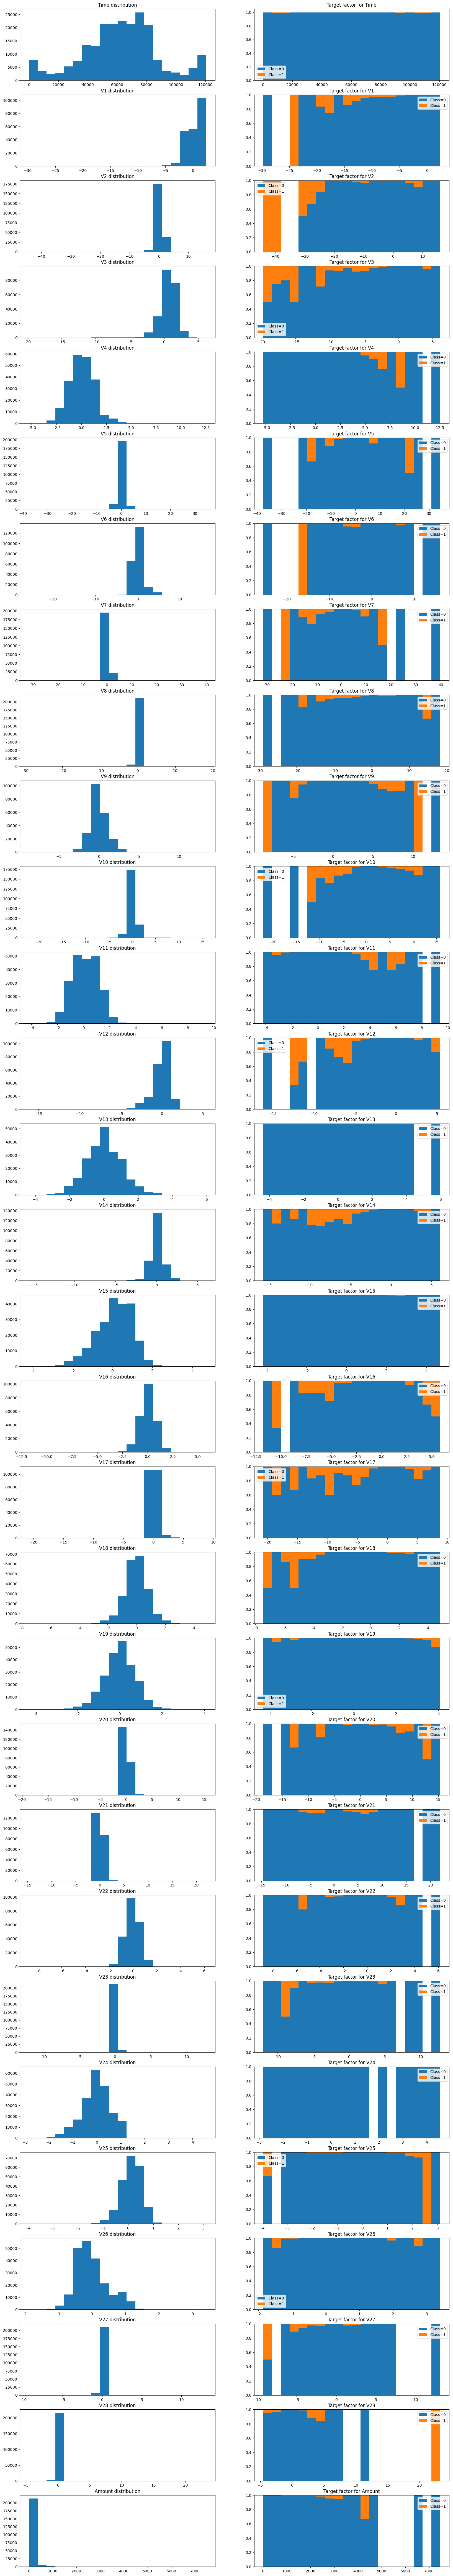

In [20]:
plot_columns_and_target_factors(
    df, target_column_name="Class", excluded_columns={"id"}
)


# PCA

In [21]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(
    df.select(pl.exclude(["id", "Time", "Class"])).to_numpy()
)
df = df.with_columns([
    pl.Series(name='pca_0', values=transformed[:, 0]),
    pl.Series(name='pca_1', values=transformed[:, 1]),
])

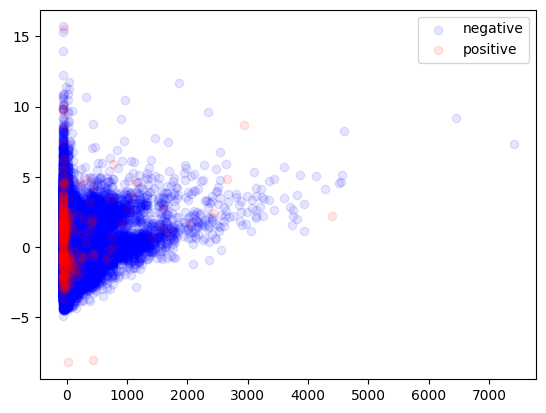

In [22]:
negative_df = df.filter(pl.col("Class") == 0)
positive_df = df.filter(pl.col("Class") == 1)
_ = plt.scatter(negative_df['pca_0'], negative_df["pca_1"], c='b', alpha=0.1, label="negative")
_ = plt.scatter(positive_df['pca_0'], positive_df["pca_1"], c='r', alpha=0.1, label="positive")
_ = plt.legend()

# No export necessary

There were not modifications made to the data.

# Analyze old dataset

In [23]:
OLD_FILE_PATH = Path.cwd() / "old.csv"
assert OLD_FILE_PATH.exists()
assert OLD_FILE_PATH.is_file()


In [24]:
old_df = pl.read_csv(OLD_FILE_PATH, dtypes={'Time': pl.Float64}).with_column(pl.lit(-1).alias('id'))
old_df

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,id
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i32
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-1
0.0,1.191857,0.266151,0.16648,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.008983,0.014724,2.69,0,-1
1.0,-1.358354,-1.340163,1.773209,0.37978,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.1083,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.5,0,-1
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.11967,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0,-1
2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.08108,3.67,0,-1
4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.46496,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,-1
7.0,-0.644269,1.417964,1.07438,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.8,0,-1
7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.2,0,-1


In [25]:
old_df.null_count()

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,id
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/home/kurazu/workspace/kaggle-playground-s03-e02/playground/eda/visualization.py:83: RuntimeWarning: invalid value encountered in divide
  factors = (histogram / hist for histogram in histograms)


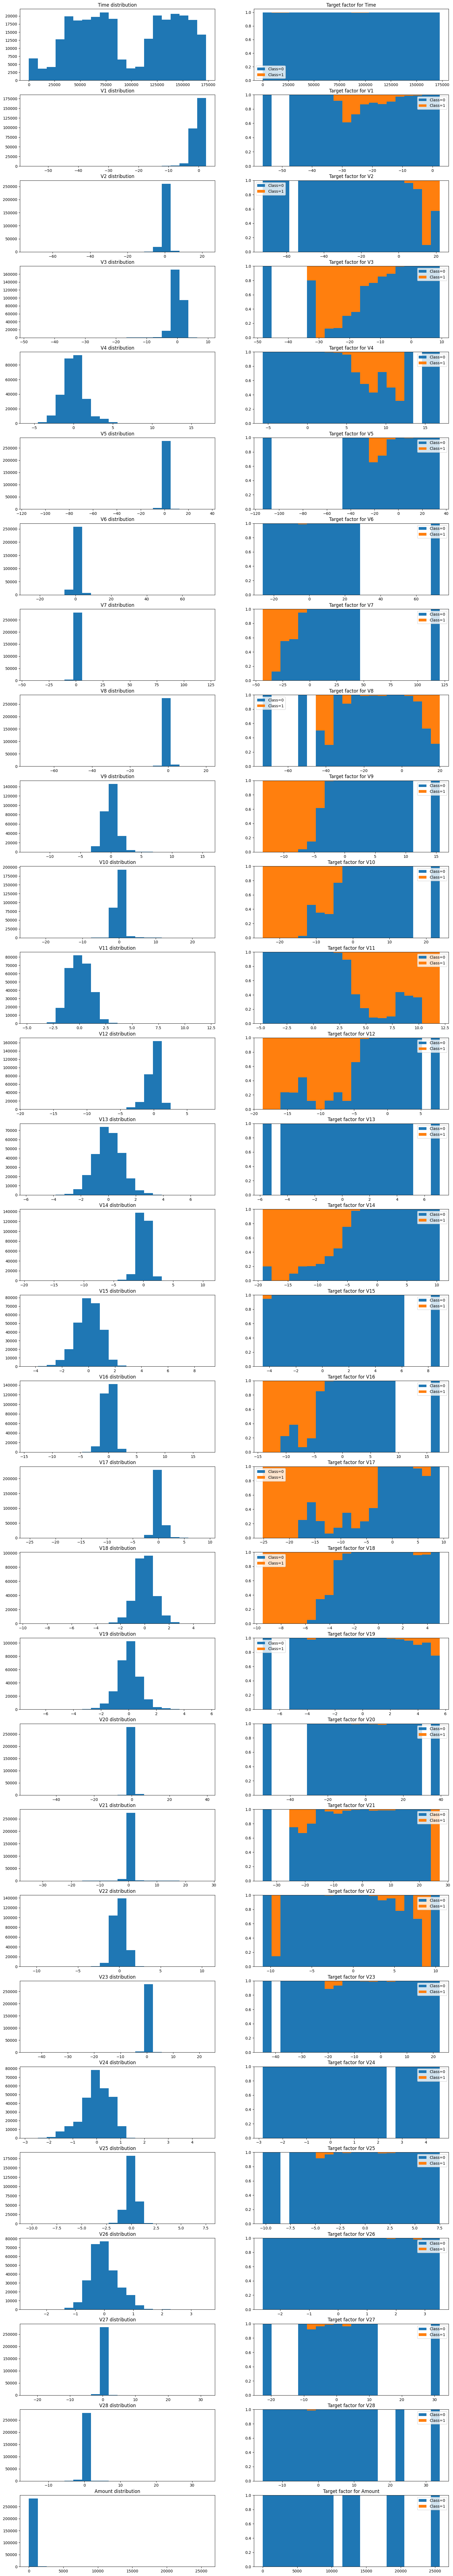

In [26]:
plot_columns_and_target_factors(
    old_df, target_column_name="Class", excluded_columns={"id"}
)


In [27]:
transformed = pca.transform(
    old_df.select(pl.exclude(["id", "Time", "Class"])).to_numpy()
)
old_df = old_df.with_columns([
    pl.Series(name='pca_0', values=transformed[:, 0]),
    pl.Series(name='pca_1', values=transformed[:, 1]),
])

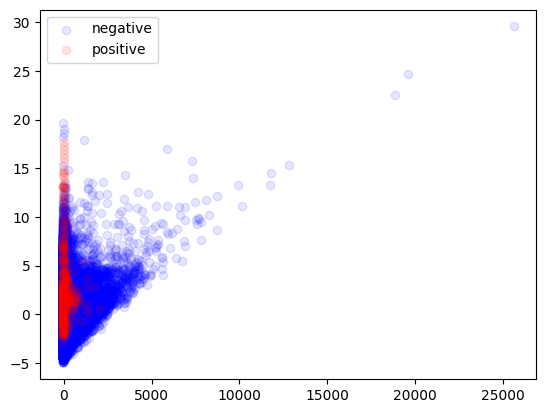

In [28]:
negative_df = old_df.filter(pl.col("Class") == 0)
positive_df = old_df.filter(pl.col("Class") == 1)
_ = plt.scatter(negative_df['pca_0'], negative_df["pca_1"], c='b', alpha=0.1, label="negative")
_ = plt.scatter(positive_df['pca_0'], positive_df["pca_1"], c='r', alpha=0.1, label="positive")
_ = plt.legend()

In [30]:
old_df.select(pl.exclude(['pca_0', 'pca_1'])).write_csv(Path.cwd() / "old.adjusted.csv")